In [82]:
#%load_ext autoreload
#%autoreload 2
import acs_implementation as a_i
import acs_features as a_f
import matplotlib.pyplot as plt
import numpy as np
#fac ='/Users/csolisu/Downloads/rcra_downloads/RCRA_FACILITIES.csv'
#evalu = '/Users/csolisu/Downloads/rcra_downloads/RCRA_EVALUATIONS.csv'
#shp_file = '/Users/csolisu/Downloads/tl_2017_us_zcta510/tl_2017_us_zcta510.shp'
#zip_to_zta_csv = '/Users/csolisu/Downloads/zip_to_zcta_2017.xlsx'

#a,b = a_i.go(fac,evalu, zip_to_zta_csv,shp_file)

In [21]:
def histogram_by_group(data,label):
    '''
    Plots histogram of all features in dataframe differentiated
    by all categories of the label 
    Input:
        data(dataframe)
        label(str): label name
    Output:
        Histogram plots
    '''
    for i, col in enumerate(data.columns):
        plt.figure(i)
        data_gr = data.groupby(label)[col]
        data_gr.plot(kind='hist', figsize=[12,6], 
                     alpha=.4, title = col, legend=True)

In [125]:
a_ = a[(a['FOUND_VIOLATION'] == 'Y  ')|(a['FOUND_VIOLATION'] == 'N  ')]
tf_dic = {'Y  ': 1, 'N  ':0}
a_= a_.replace({'FOUND_VIOLATION': tf_dic})

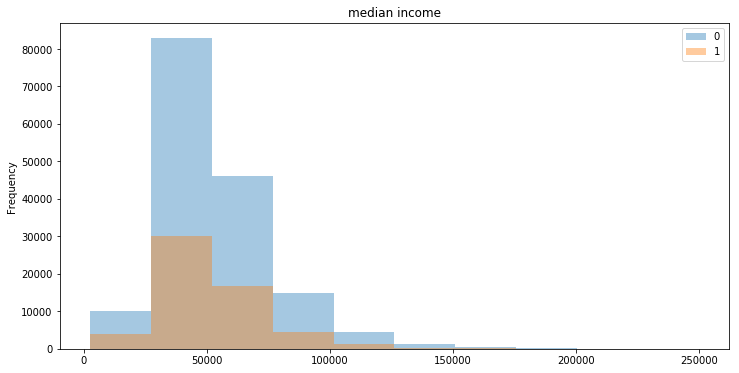

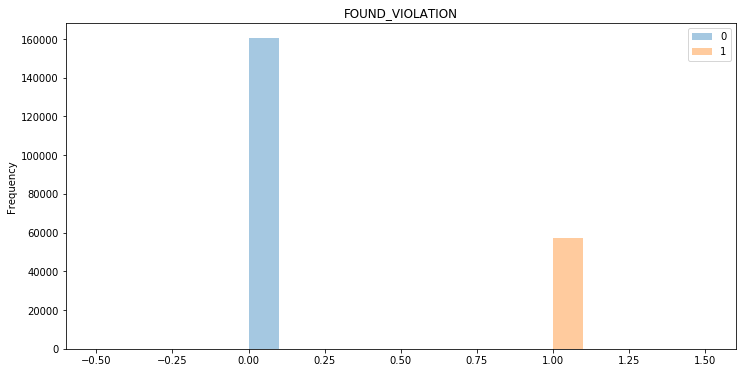

In [55]:
#INCOME
inc_graph = a_[['median income','FOUND_VIOLATION']]
inc_graph = inc_graph.dropna(subset = ['median income'])
inc_graph = inc_graph[inc_graph['median income'] != -666666666.0]
inc_graph.sort_values(by='median income', ascending= True,inplace= True)
histogram_by_group(inc_graph,'FOUND_VIOLATION')

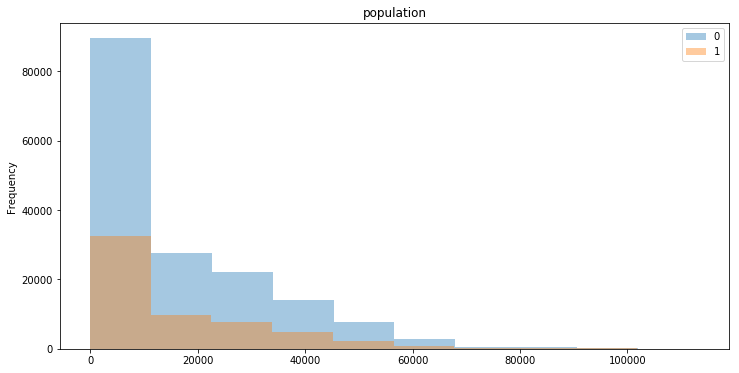

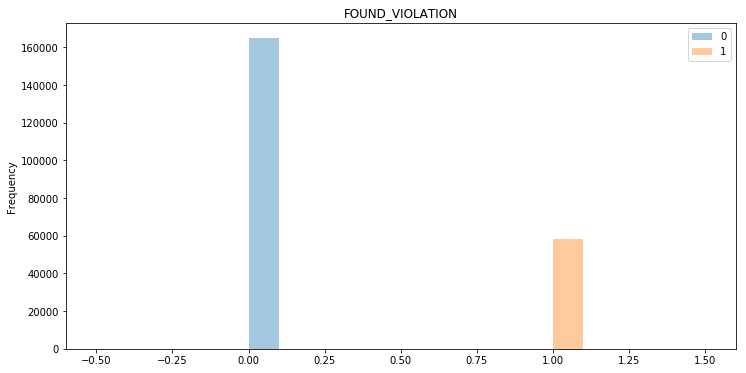

In [50]:
#POPULATION
pop_graph = a_[['population','FOUND_VIOLATION']]
pop_graph = pop_graph.dropna(subset = ['population'])
histogram_by_group(pop_graph,'FOUND_VIOLATION')


In [ ]:
def convert_percent(df, pref):
    '''
    Converts a continuous variable into a percent variable, for acs
    Input:
        df(DataFrame): dataframe to be divided
        pref(str): prefix of the variable. 
    Output:
        dataframe with convertd percentage
    '''
    filter_col = [col for col in df if col.startswith(pref)]
    small_df = df[filter_col]
    small_df['Total'] = small_df[filter_col].sum(axis = 1)
    
    for col in filter_col:
        small_df[col] = np.where(small_df['Total']==0, 0, small_df[col]/small_df['Total'])
    del small_df['Total']
    return small_df

In [121]:
race_cat = {'B02001_002E': 'white alone', 
                'B02001_003E': 'black alone',
                'B02001_004E': 'native alone',
                'B02001_005E': 'asian alone',
                'B02001_006E': 'pacific alone',
                'B02001_007E': 'other alone',
                'B02001_008E': 'two or more',
                'B02001_009E': 'two or more some other'}

inc_cat = { 'B19001_002E': 'less10k', 'B19001_003E': '10kto15k',
                'B19001_004E': '15kto20k', 'B19001_005E': '20kto25k',
                'B19001_006E': '25kto30k', 'B19001_007E': '30kto35k',
                'B19001_008E': '35kto40k', 'B19001_009E': '40kto45k',
                'B19001_010E': '45kto50k', 'B19001_011E': '50kto55k',
                'B19001_012E': '60kto75k', 'B19001_013E': '75kto100k',
                'B19001_014E': '100kto125k', 'B19001_015E': '125kto145k',
                'B19001_016E': '150kto200k', 'B19001_017E': '200kmore'}

family_cat = {'B11016_003E': '2 person',
                  'B11016_004E': '3 person',
                  'B11016_005E': '4 person',
                  'B11016_006E': '5 person',
                  'B11016_007E': '6 person',
                  'B11016_008E': '7plusperson'} 

ratio_pov_cat_fam = {
                'B17026_002E': 'under_p5', 
                'B17026_003E': 'p5top74',
                'B17026_004E': 'p75top99',
                'B17026_005E': '1to1p24',
                'B17026_006E': '1p25to1p49',
                'B17026_007E': '1p50to1p74',
                'B17026_008E': '1p75to1p84',
                'B17026_009E': '1p85to1p99',
                'B17026_010E': '2to2p99',
                'B17026_011E': '3to3p99',
                'B17026_012E': '4to4p99',
                'B17026_013E': '5andover'
    }

ratio_pov_cat_peop = {
                'C17002_002E': 'under_p5', 
                'C17002_003E': 'p5top99',
                'C17002_004E': '1to1p24',
                'C17002_005E': '1p25to1p49',
                'C17002_006E': '1p50to1p84',
                'C17002_007E': '1p85to1p99',
                'C17002_008E': '2andver' }

pop_cat = {'B01003_001E': 'population'}
med_inc_cat = {'B19013_001E': 'median income'}

educ_cat = { 'B15003_002E':'no school',
                 'B15003_003E':'nursery'  ,
                 'B15003_004E':'kindergarten'  ,
                 'B15003_005E':'1stgrade' ,
                 'B15003_006E':'2ndgrade',
                 'B15003_007E':'3rdgrade' ,
                 'B15003_008E':'4thgrade',
                 'B15003_009E':'5thgrade',
                 'B15003_010E':'6thgrade',
                 'B15003_011E':'7thgrade',
                 'B15003_012E':'8thgrade',
                 'B15003_013E':'9thgrade',
                 'B15003_014E':'10thgrade',
                 'B15003_015E':'11thgrade',
                 'B15003_016E':'12thgrade',
                 'B15003_017E':'regular_hsd',
                 'B15003_018E':'ged',
                 'B15003_019E':'some college',
                 'B15003_020E':'some college no degree',
                 'B15003_02E1':'associate degree',
                 'B15003_022E':'bachelor',
                 'B15003_023E':'master',
                 'B15003_023E':'professional school' ,
                 'B15003_024E':'doctorate'           
               }

dcat = {'B02001_00':race_cat,'B19001_00':inc_cat, 'B11016_00':family_cat, 'B17026_00':ratio_pov_cat_fam,
            'C17002_00':ratio_pov_cat_peop,'C17002_00':ratio_pov_cat_peop}

def convert_percent(df, pref,label,new_cat):
    '''
    Converts a continuous variable into a percent variable, for acs
    Input:
        df(DataFrame): dataframe to be divided
        pref(str): prefix of the variable. 
    Output:
        dataframe with convertd percentage
    '''
    filter_col = [col for col in df if col.startswith(pref)] 
    big_filter = filter_col + [label]
    print(big_filter)
    small_df = df[big_filter]
    small_df = small_df.groupby(label).sum()
    small_df['Total'] = small_df[filter_col].sum(axis = 1)
    for col in filter_col:
        small_df[col] = np.where(small_df['Total']==0, 0, small_df[col]/small_df['Total'])
    del small_df['Total']
    small_df.rename(columns = new_cat,inplace = True)
    return small_df


['B02001_002E', 'B02001_003E', 'B02001_004E', 'B02001_005E', 'B02001_006E', 'B02001_007E', 'B02001_008E', 'B02001_009E', 'FOUND_VIOLATION']


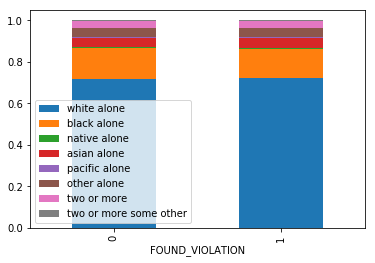

In [113]:
#RACE
smdf = convert_percent(a_,'B02001_00', 'FOUND_VIOLATION',dcat['B02001_00'])
sm = smdf.groupby('FOUND_VIOLATION').sum()
sm.plot(kind='bar', stacked = True)

['B19001_002E', 'B19001_003E', 'B19001_004E', 'B19001_005E', 'B19001_006E', 'B19001_007E', 'B19001_008E', 'B19001_009E', 'FOUND_VIOLATION']


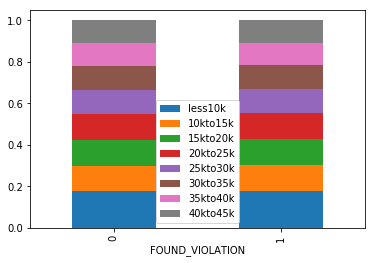

In [114]:
#DISTRIBUTION OF HOUSEHOLD INCOME
smdf = convert_percent(a_,'B19001_00', 'FOUND_VIOLATION',dcat['B19001_00'])
sm = smdf.groupby('FOUND_VIOLATION').sum()
sm.plot(kind='bar', stacked = True)

['B17026_002E', 'B17026_003E', 'B17026_004E', 'B17026_005E', 'B17026_006E', 'B17026_007E', 'B17026_008E', 'B17026_009E', 'FOUND_VIOLATION']


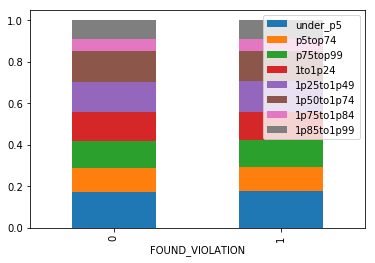

In [115]:
#RATIO OF INCOME TO POVERTY, PERSONAL
smdf = convert_percent(a_,'B17026_00', 'FOUND_VIOLATION',dcat['B17026_00'])
sm = smdf.groupby('FOUND_VIOLATION').sum()
sm.plot(kind='bar', stacked = True)

['C17002_002E', 'C17002_003E', 'C17002_004E', 'C17002_005E', 'C17002_006E', 'C17002_007E', 'C17002_008E', 'FOUND_VIOLATION']


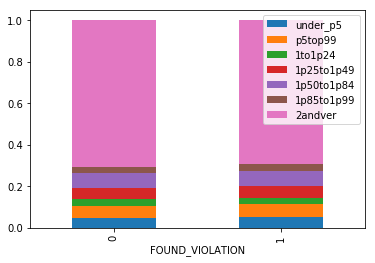

In [126]:
# RATIO OF INCOME TO POVERTY, HOME
a_.rename(columns = {'C17002_008E_x':'C17002_008E'}, inplace = True)
a_.drop(['C17002_008E_y'], axis=1, inplace = True)
smdf = convert_percent(a_,'C17002_00', 'FOUND_VIOLATION',dcat['C17002_00'])
sm = smdf.groupby('FOUND_VIOLATION').sum()
sm.plot(kind='bar', stacked = True)

In [120]:
lst

['ACTIVE_SITE',
 'ACTIVITY_LOCATION_x',
 'population',
 'white alone',
 'black alone',
 'native alone',
 'asian alone',
 'pacific alone',
 'other alone',
 'two or more',
 'two or more some other',
 'B02001_010E',
 'B11016_002E_x',
 'B11016_003E',
 'B11016_004E',
 'B11016_005E',
 'B11016_006E',
 'B11016_007E',
 'B11016_008E',
 'B17026_002E',
 'B17026_003E',
 'B17026_004E',
 'B17026_005E',
 'B17026_006E',
 'B17026_007E',
 'B17026_008E',
 'B17026_009E',
 'B17026_010E',
 'B17026_011E',
 'B17026_012E',
 'B17026_013E',
 'B19001_002E',
 'B19001_003E',
 'B19001_004E',
 'B19001_005E',
 'B19001_006E',
 'B19001_007E',
 'B19001_008E',
 'B19001_009E',
 'B19001_010E',
 'B19001_011E',
 'B19001_012E',
 'B19001_013E',
 'B19001_014E',
 'B19001_015E',
 'B19001_016E',
 'B19001_017E',
 'median income',
 'C17002_002E',
 'C17002_003E',
 'C17002_004E',
 'C17002_005E',
 'C17002_006E',
 'C17002_007E',
 'C17002_008E_x',
 'CITY_NAME',
 'CLASSFP10',
 'EVALUATION_AGENCY',
 'EVALUATION_DESC',
 'EVALUATION_IDENTIFIER